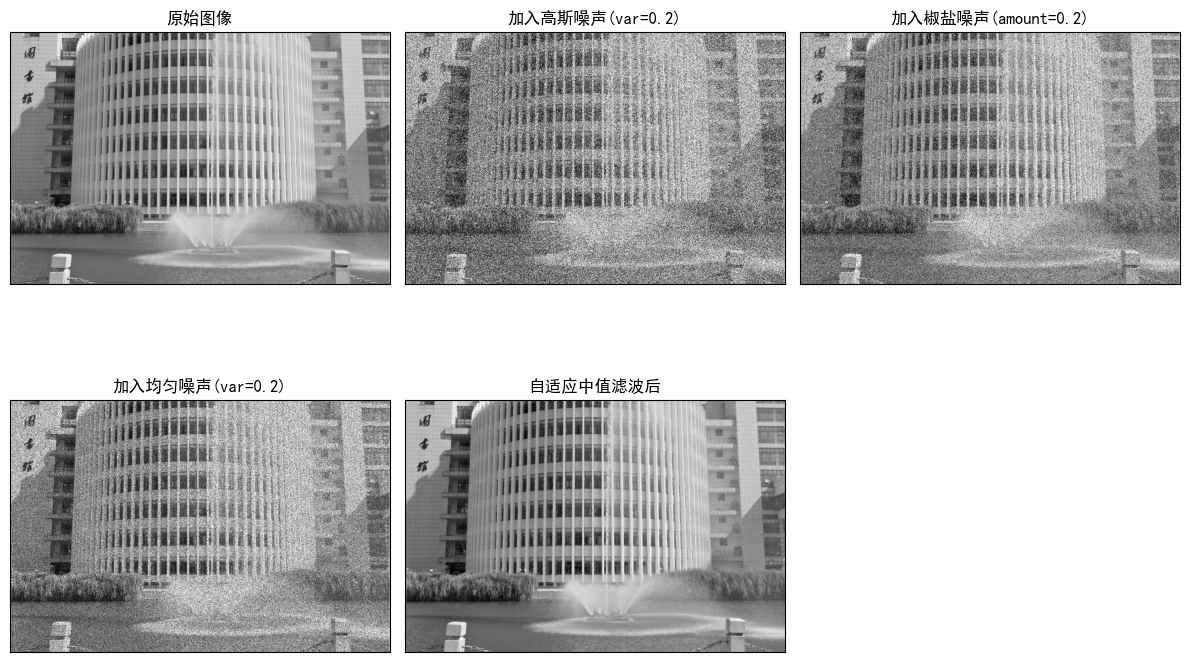

In [1]:
from skimage import util
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.ndimage import minimum_filter, maximum_filter, median_filter

# 自适应中值滤波函数
def adp_median(I, Smax):
    if Smax <= 1 or Smax % 2 == 0:
        raise ValueError("Smax must be an odd integer > 1")
    II = np.zeros_like(I)
    already_processed = np.zeros(I.shape, dtype=bool)

    for k in range(3, Smax + 1, 2):
        zmin = minimum_filter(I, size=k, mode='reflect')
        zmax = maximum_filter(I, size=k, mode='reflect')
        zmed = median_filter(I, size=k, mode='reflect')

        A1 = zmed > zmin
        A2 = zmax > zmed
        process_using_levelB = (A1 & A2) & ~already_processed

        B1 = I - zmin
        B2 = I - zmax
        zB = (B1 > 0) & (B2 < 0)

        output_zxy = process_using_levelB & zB
        output_zmed = process_using_levelB & ~zB

        II[output_zxy] = I[output_zxy]
        II[output_zmed] = zmed[output_zmed]
        already_processed |= process_using_levelB

        if np.all(already_processed):
            break

    II[~already_processed] = zmed[~already_processed]
    return II

# 读取图像并添加噪声
img1 = Image.open("D:/picture/school.png").convert('L')
img = np.array(img1)

# 添加噪声
noisy_gaussian = util.random_noise(img, mode='gaussian', mean=0, var=0.2)
noisy_salt_pepper = util.random_noise(img, mode='s&p', amount=0.2)
noisy_uniform = util.random_noise(img, mode='speckle', mean=0, var=0.2)

# 将加入椒盐噪声的图像通过自适应中值滤波处理
noisy_salt_pepper_uint8 = (noisy_salt_pepper * 255).astype(np.uint8)  # 转换为uint8类型
filtered_img = adp_median(noisy_salt_pepper_uint8, Smax=7)  # Smax可以根据需求调整

# 显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title('原始图像')
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='gray')

plt.subplot(232)
plt.title('加入高斯噪声(var=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_gaussian, cmap='gray')

plt.subplot(233)
plt.title('加入椒盐噪声(amount=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_salt_pepper, cmap='gray')

plt.subplot(234)
plt.title('加入均匀噪声(var=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_uniform, cmap='gray')

plt.subplot(235)
plt.title('自适应中值滤波后')
plt.xticks([])
plt.yticks([])
plt.imshow(filtered_img, cmap='gray')

plt.tight_layout()
plt.show()


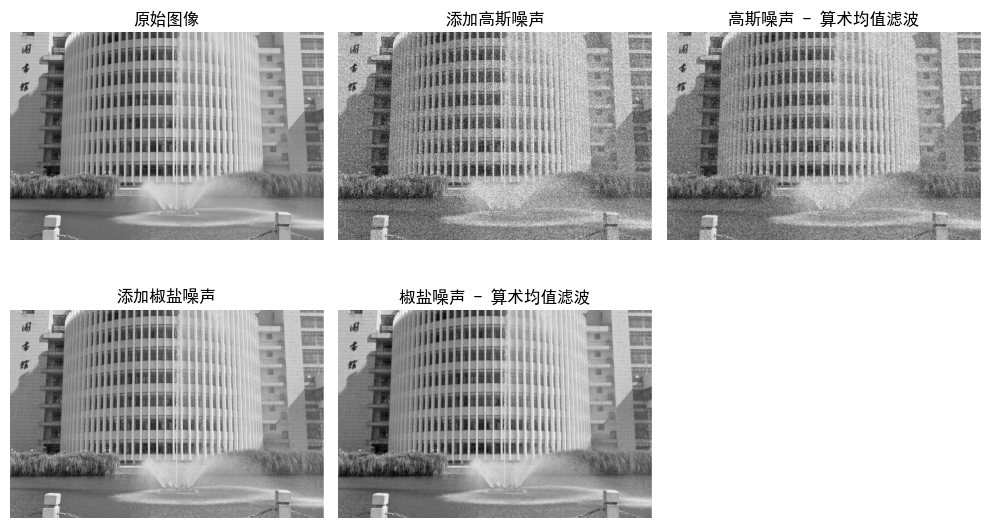

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为浮点型
I = cv2.imread("D:/picture/school.png", cv2.IMREAD_GRAYSCALE)
I = I / 255.0  # 转换为0-1的浮点型

# 添加高斯噪声
def add_gaussian_noise(image, mean=0, var=0.05):
    sigma = var**0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 1)  # 限制在0-1范围
    return noisy_image

# 添加椒盐噪声
def add_salt_pepper_noise(image, amount=0.01):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5)
    num_pepper = np.ceil(amount * image.size * 0.5)

    # 添加盐噪声 (白色)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1

    # 添加椒噪声 (黑色)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

# 算术均值滤波
def arithmetic_mean_filter(image, ksize=3):
    kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# 生成噪声图像
noisy_gaussian = add_gaussian_noise(I, mean=0, var=0.05)
noisy_salt_pepper = add_salt_pepper_noise(I, amount=0.01)

# 对噪声图像进行算术均值滤波
filtered_gaussian = arithmetic_mean_filter(noisy_gaussian, ksize=3)
filtered_salt_pepper = arithmetic_mean_filter(noisy_salt_pepper, ksize=3)

# 显示结果
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.title('原始图像')
plt.imshow(I, cmap='gray')
plt.axis('off')

plt.subplot(232)
plt.title('添加高斯噪声')
plt.imshow(noisy_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(233)
plt.title('高斯噪声 - 算术均值滤波')
plt.imshow(filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(234)
plt.title('添加椒盐噪声')
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.axis('off')

plt.subplot(235)
plt.title('椒盐噪声 - 算术均值滤波')
plt.imshow(filtered_salt_pepper, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


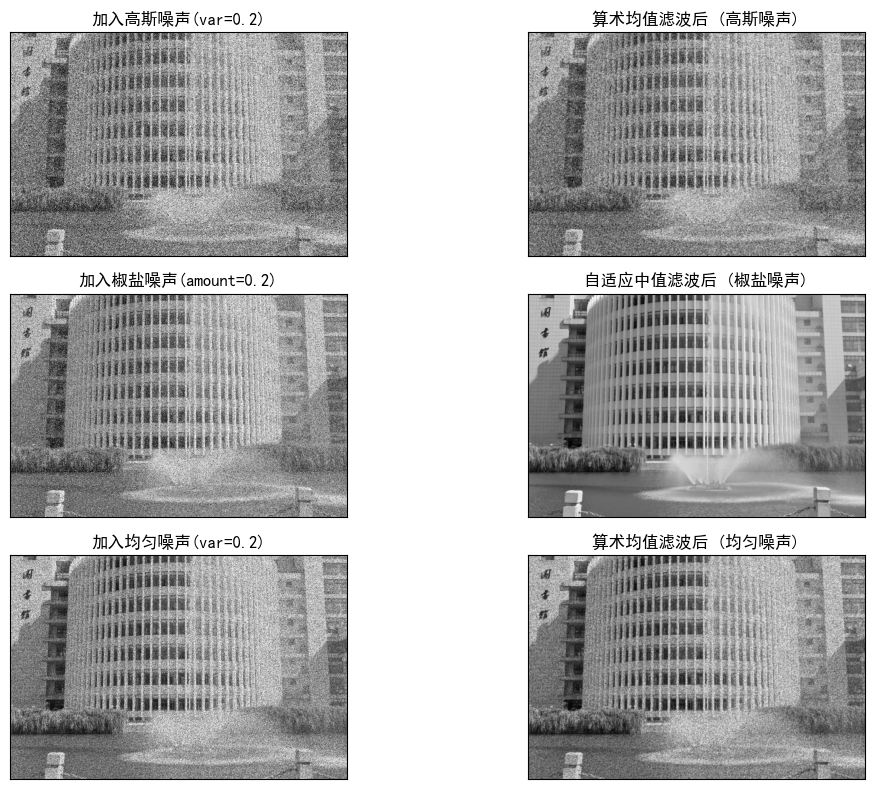

In [15]:
from skimage import util
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.ndimage import minimum_filter, maximum_filter, median_filter
import cv2

# 自适应中值滤波函数
def adp_median(I, Smax):
    if Smax <= 1 or Smax % 2 == 0:
        raise ValueError("Smax must be an odd integer > 1")
    II = np.zeros_like(I)
    already_processed = np.zeros(I.shape, dtype=bool)

    for k in range(3, Smax + 1, 2):
        zmin = minimum_filter(I, size=k, mode='reflect')
        zmax = maximum_filter(I, size=k, mode='reflect')
        zmed = median_filter(I, size=k, mode='reflect')

        A1 = zmed > zmin
        A2 = zmax > zmed
        process_using_levelB = (A1 & A2) & ~already_processed

        B1 = I - zmin
        B2 = I - zmax
        zB = (B1 > 0) & (B2 < 0)

        output_zxy = process_using_levelB & zB
        output_zmed = process_using_levelB & ~zB

        II[output_zxy] = I[output_zxy]
        II[output_zmed] = zmed[output_zmed]
        already_processed |= process_using_levelB

        if np.all(already_processed):
            break

    II[~already_processed] = zmed[~already_processed]
    return II

# 算术均值滤波函数
def arithmetic_mean_filter(image, ksize=7):
    kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# 读取图像并添加噪声
img1 = Image.open("D:/picture/school.png").convert('L')
img = np.array(img1)

# 添加噪声
noisy_gaussian = util.random_noise(img, mode='gaussian', mean=0, var=0.2)
noisy_salt_pepper = util.random_noise(img, mode='s&p', amount=0.2)
noisy_uniform = util.random_noise(img, mode='speckle', mean=0, var=0.2)

# 将噪声图像转换为 uint8 类型
noisy_gaussian_uint8 = (noisy_gaussian * 255).astype(np.uint8)
noisy_salt_pepper_uint8 = (noisy_salt_pepper * 255).astype(np.uint8)
noisy_uniform_uint8 = (noisy_uniform * 255).astype(np.uint8)

# 应用自适应中值滤波到椒盐噪声图像
filtered_salt_pepper = adp_median(noisy_salt_pepper_uint8, Smax=7)

# 应用算术均值滤波到高斯噪声和均匀噪声图像
filtered_gaussian = arithmetic_mean_filter(noisy_gaussian_uint8, ksize=3)
filtered_uniform = arithmetic_mean_filter(noisy_uniform_uint8, ksize=3)

# 显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

plt.subplot(321)
plt.title('加入高斯噪声(var=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_gaussian, cmap='gray')

plt.subplot(322)
plt.title('算术均值滤波后 (高斯噪声)')
plt.xticks([])
plt.yticks([])
plt.imshow(filtered_gaussian, cmap='gray')

plt.subplot(323)
plt.title('加入椒盐噪声(amount=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_salt_pepper, cmap='gray')

plt.subplot(324)
plt.title('自适应中值滤波后 (椒盐噪声)')
plt.xticks([])
plt.yticks([])
plt.imshow(filtered_salt_pepper, cmap='gray')

plt.subplot(325)
plt.title('加入均匀噪声(var=0.2)')
plt.xticks([])
plt.yticks([])
plt.imshow(noisy_uniform, cmap='gray')

plt.subplot(326)
plt.title('算术均值滤波后 (均匀噪声)')
plt.xticks([])
plt.yticks([])
plt.imshow(filtered_uniform, cmap='gray')

plt.tight_layout()
plt.show()
